# このノートブックでやること

* 複数の異なる手法で２値化を行う  
[1]https://algorithm.joho.info/programming/python/opencv-threshold-binary-py/  
(使用している画像はフリー素材)

In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

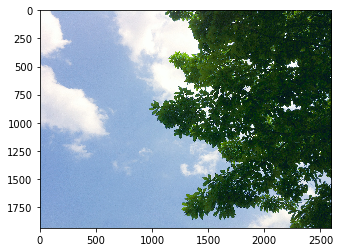

In [2]:
# 入力画像の読み込み
img = cv2.imread("img/Tree.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)#元画像の表示

## ルールベースで２値化

In [3]:
t = 127　#閾値の設定

# 入力画像の読み込み
img = cv2.imread("img/Tree.jpeg")
# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# 出力画像用の配列生成
th1 = gray.copy()

th1[gray < t] = 0
th1[gray >= t] = 255
# 結果を出力
plt.imshow(th1)#2値化

SyntaxError: invalid character in identifier (<ipython-input-3-e6f329ada8da>, line 1)

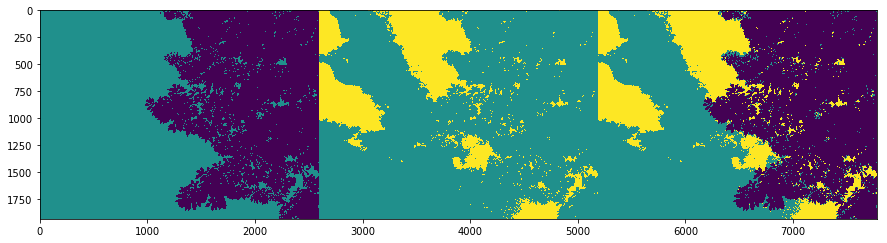

In [4]:
#閾値の設定
t1 = 100
t2 = 200
# 入力画像の読み込み
img = cv2.imread("img/Tree.jpeg")

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 出力画像用の配列生成
low=np.where(gray< t1,-1,0)#木とそれ以外の分離
high=np.where(gray>t2,1,0)#雲とそれ以外の分離
concat=low+high#highとlowの足し合わせ． 木が-1, 空が0, 雲が１と表示される.

im_h = cv2.hconcat([low,high,concat])
matplotlib.pyplot.rcParams['figure.figsize'] = (15.0, 15.0)
plt.imshow(im_h)

## 大津の方法
* 自動的に閾値を決定して二値化処理を行う
* OpenCVのライブラリも存在するが，まずはスクラッチで　　
* 参考：https://algorithm.joho.info/programming/python/opencv-otsu-thresholding-py/

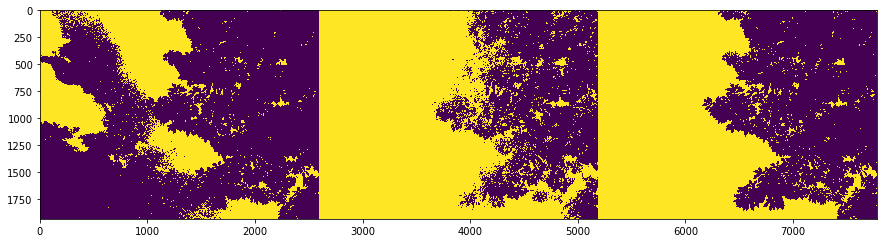

In [10]:
hist = [np.sum(gray == i) for i in range(256)]

s_max = (0,-10)

th_over = gray.copy()
th_under = gray.copy()
th_otsu = gray.copy()

for th in range(256):

    # クラス1とクラス2の画素数を計算
    n1 = sum(hist[:th])
    n2 = sum(hist[th:])

    # クラス1とクラス2の画素値の平均を計算
    if n1 == 0 : mu1 = 0
    else : mu1 = sum([i * hist[i] for i in range(0,th)]) / n1   
    if n2 == 0 : mu2 = 0
    else : mu2 = sum([i * hist[i] for i in range(th, 256)]) / n2

    # クラス間分散の分子を計算
    s = n1 * n2 * (mu1 - mu2) ** 2

    # クラス間分散の分子が最大のとき、クラス間分散の分子と閾値を記録
    if s > s_max[1]:
        s_max = (th, s)

# クラス間分散が最大のときの閾値を取得
t_over = s_max[0]+70
th_over[gray < t_over] = 0
th_over[gray >= t_over] = 255

t_under = s_max[0]-70
th_under[gray < t_under] = 0
th_under[gray >= t_under] = 255

t = s_max[0]
th_otsu[gray < t] = 0
th_otsu[gray >= t] = 255

matplotlib.pyplot.rcParams['figure.figsize'] = (5.0, 5.0)
im_otsu = cv2.hconcat([th_over,th_under,th_otsu])
matplotlib.pyplot.rcParams['figure.figsize'] = (15.0, 15.0)

#左から順番に閾値を高く設定しすぎ，低く設定しすぎ，otsuで自動設定したパターンの比較
#本来は白，青，緑の３色ではなく，おおきく２色が混在しているパターンで試すべき．
plt.imshow(im_otsu)